In [1]:
from scipy import misc

import matplotlib.pyplot as plt
import numpy as np
import math

import scipy.ndimage.filters as filters
import scipy.ndimage as ndimage

DIR = "data/hough_transform/"

img = misc.imread(DIR + "orig.png")

print("image shape: ", img.shape)

plt.imshow(img, )
plt.savefig(DIR + "image.png", bbox_inches='tight')
plt.close()


/home/twig/anaconda3/envs/RK4/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if sys.path[0] == '':


image shape:  (766, 226, 4)


In [8]:
img_shape = img.shape

x_max = img_shape[0]
y_max = img_shape[1]

theta_max = 1.0 * math.pi 
theta_min = 0.0

r_min = 0.0
r_max = math.hypot(x_max, y_max)

r_dim = 200 
theta_dim = 300

hough_space = np.zeros((r_dim,theta_dim))

for x in range(x_max):
    for y in range(y_max):
        if img[x,y,0] == 255: continue
        for itheta in range(theta_dim):
            theta = 1.0 * itheta * theta_max / theta_dim
            r = x * math.cos(theta) + y * math.sin(theta)
            ir = r_dim * ( 1.0 * r ) / r_max
            hough_space[ir,itheta] = hough_space[ir,itheta] + 1

plt.imshow(hough_space, origin='lower')
plt.xlim(0,theta_dim)
plt.ylim(0,r_dim)

tick_locs = [i for i in range(0,theta_dim,40)]
tick_lbls = [round( (1.0 * i * theta_max) / theta_dim,1) for i in range(0,theta_dim,40)]
plt.xticks(tick_locs, tick_lbls)

tick_locs = [i for i in range(0,r_dim,20)]
tick_lbls = [round( (1.0 * i * r_max ) / r_dim,1) for i in range(0,r_dim,20)]
plt.yticks(tick_locs, tick_lbls)

plt.xlabel(r'Theta')
plt.ylabel(r'r')
plt.title('Hough Space')

plt.savefig("hough_space_r_theta.png",bbox_inches='tight')

plt.close()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [2]:
import numpy as np

from skimage.transform import (hough_line, hough_line_peaks, probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm

In [14]:
# Using real image
image = misc.imread(DIR + "orig.png")

print("image shape: ", image.shape)

image shape:  (766, 226)


/home/twig/anaconda3/envs/RK4/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


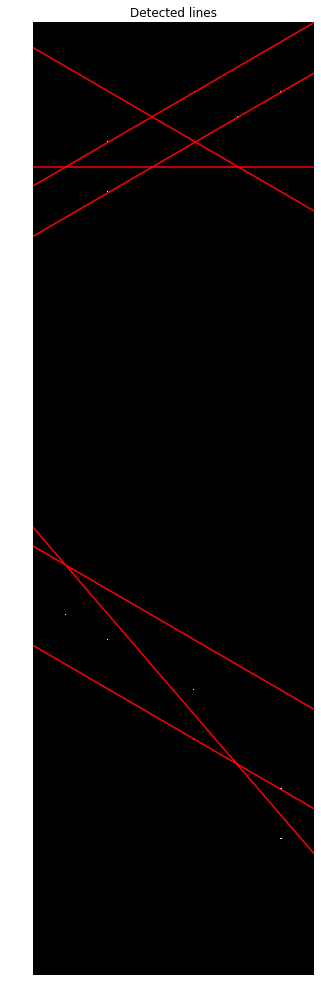

<Figure size 432x288 with 0 Axes>

In [15]:
# Classic straight-line Hough transform
h, theta, d = hough_line(image)

# Generating figure 1
fix, ax = plt.subplots(1, 1, figsize=(8, 14))

ax.imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax.plot((0, image.shape[1]), (y0, y1), '-r')
ax.set_xlim((0, image.shape[1]))
ax.set_ylim((image.shape[0], 0))
ax.set_axis_off()
ax.set_title('Detected lines')

plt.tight_layout()
plt.show()

# Line finding using the Probabilistic Hough Transform
image = data.camera()
edges = canny(image, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=5,
                                 line_gap=3)

plt.tight_layout()
plt.show()
